In [1]:
# example of loading the cifar10 dataset

from tensorflow.keras.datasets.cifar10 import load_data

In [2]:
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

170508288/170498071 [==============================] - 5936s 35us/step


In [3]:
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


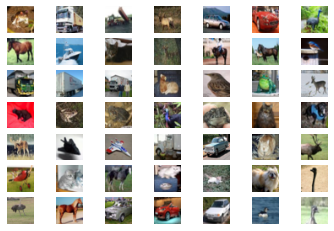

In [4]:
# example of loading and plotting the cifar10 dataset

from matplotlib import pyplot

# plot images from the training dataset
for i in range(49):
    # define subplot
    pyplot.subplot(7,7,1+i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(trainX[i])
pyplot.show()

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [7]:
# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
    
    model = Sequential()
    
    # normal
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [8]:
from tensorflow.keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

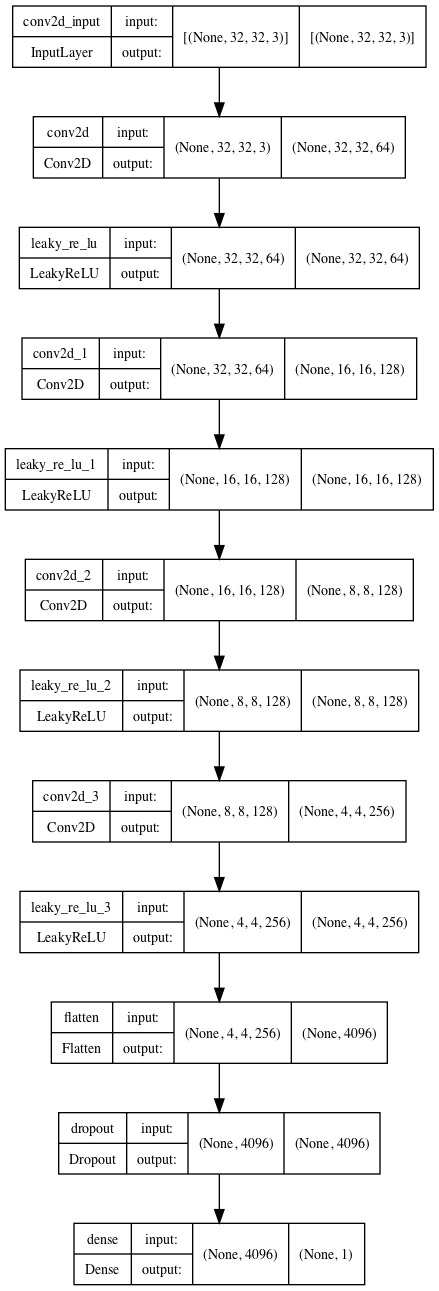

In [9]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# load cifar10 dataset

(trainX,_),(_,_) = load_data()

In [11]:
# convert from unsigned ints to floats
X = trainX.astype('float32')
# scale from [0,255] to [-1,1]
X = (X - 127.5) / 127.5

In [12]:
# load and prepare cifar10 training images
def load_real_samples():
    # load cifar10 dataset
    (trainX,_),(_,_) = load_data()
    # convert from unsigned ints to floats
    X = trainX.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    return X

In [17]:
from numpy.random import randint, rand
from numpy import zeros, ones

In [13]:
# select real samples 

def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels
    y = ones((n_samples,1))
    return X, y

In [16]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(32*32*3*n_samples)
    # update to have the range [-1,1]
    X = -1 + X*2
    # reshape into a batch of color images
    X = X.reshape((n_samples,32,32,3))
    # generate 'fake' class labels (0)
    y = zeros((n_samples,1))
    return X, y

In [20]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_iter):
        # get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        # generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        # summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [21]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model, dataset)

>1 real=67% fake=0%
>2 real=97% fake=5%
>3 real=97% fake=12%
>4 real=94% fake=55%
>5 real=95% fake=84%
>6 real=92% fake=98%
>7 real=91% fake=100%
>8 real=91% fake=100%
>9 real=88% fake=100%
>10 real=95% fake=100%
>11 real=95% fake=100%
>12 real=89% fake=100%
>13 real=86% fake=100%
>14 real=95% fake=100%
>15 real=97% fake=100%
>16 real=100% fake=100%
>17 real=98% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
